In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
uber_data = pd.merge(ride_data, city_data, on = "city", how='left')
#uber_data = uber_data.group
# Display the data table for preview
uber_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


## Bubble Plot of Ride Sharing Data

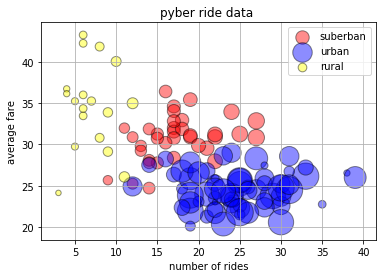

In [7]:
# Obtain the x and y coordinates for each of the three city types
uber_city = uber_data.loc[uber_data["type"] == "Suburban"].groupby("city").mean()
uber_city_counts = uber_data.loc[uber_data["type"] == "Suburban"].groupby("city").count()
#print(uber_city_counts.head())

#x_axis = np.arange(min(uber_data["fare"]) - 1, max(uber_data["fare"]) + 1)
urban_ride = uber_data.loc[uber_data["type"] == "Urban"].groupby("city").mean()
urban_ride_count = uber_data.loc[uber_data["type"] == "Urban"].groupby("city").count()
#print(urban_ride.head())
rural_ride = uber_data.loc[uber_data["type"] == "Rural"].groupby("city").mean()
rural_ride_count = uber_data.loc[uber_data["type"] == "Rural"].groupby("city").count()
suburban_ride = uber_data.loc[uber_data["type"] == "Suburban"]
# Build the scatter plots for each city types
plt.scatter(uber_city_counts["driver_count"], uber_city["fare"], marker = 'o', facecolors="red", edgecolors="black",
            s=uber_city_counts["driver_count"]*10, alpha=0.45, label = "suberban")
plt.scatter(urban_ride_count["driver_count"], urban_ride["fare"], marker = 'o', facecolor = 'blue', edgecolors = 'black',
           s = urban_ride["driver_count"]*10, alpha = .45, label = 'urban')
plt.scatter(rural_ride_count["driver_count"], rural_ride["fare"], marker = 'o', facecolor = 'yellow', edgecolors = 'black',
           s = rural_ride_count["driver_count"]*10, alpha = .45, label = 'rural')


# Incorporate the other graph properties
plt.legend(loc="best")
plt.grid()
# Create a legend
plt.title("pyber ride data ")
plt.xlabel("number of rides")
plt.ylabel("average fare")
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/scatteruber.png")
plt.show()

In [8]:
# Show plot
plt.show()

## Total Fares by City Type

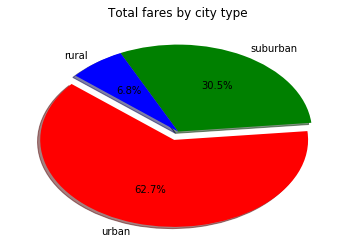

In [9]:
# Calculate Type Percents
urban_fares = uber_data.loc[uber_data["type"] == 'Urban']
urban_fares = urban_fares["fare"].sum()
suburban_fares = uber_data.loc[uber_data["type"] == "Suburban"]
suburban_fares = suburban_fares["fare"].sum()
rural_fares = uber_data.loc[uber_data['type'] == "Rural"]
rural_fares = rural_fares["fare"].sum()
fares = [urban_fares, suburban_fares, rural_fares]
labels = ["urban", "suburban", "rural"]
# Build Pie Chart
explode = (.1, 0, 0)
colors = ["red", "green", "blue"]
plt.title("Total fares by city type")
plt.pie(fares, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("../Images/fairspi.png")

In [10]:
# Show Figure
plt.show()

## Total Rides by City Type

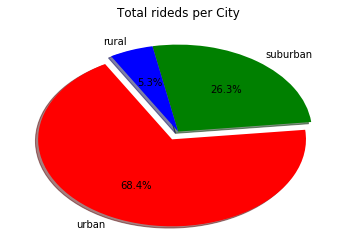

In [11]:
# Calculate Ride Percents
urban_ride = uber_data.loc[uber_data["type"] == "Urban"]
urban_ride = urban_ride["driver_count"].count()
suburban_ride = uber_data.loc[uber_data["type"] == "Suburban"]
suburban_ride = suburban_ride["driver_count"].count()
rural_ride = uber_data.loc[uber_data["type"] == "Rural"]
rural_ride = rural_ride["driver_count"].count()
# Build Pie Chart
ride = [urban_ride, suburban_ride, rural_ride]
labels = ["urban", "suburban", "rural"]
colors = ["red", "green", "blue"]
expload = (.1, 0, 0)
plt.title("Total rideds per City")
plt.pie(ride, explode = expload, labels = labels, colors = colors, 
        autopct = "%1.1f%%", shadow = True, startangle = 120)
# Save Figure
plt.savefig("../Images/totalrides.png")

In [12]:
# Show Figure
plt.show()

## Total Drivers by City Type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


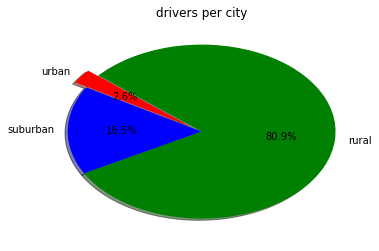

In [13]:
# Calculate Driver Percents
driver1 = city_data.groupby("type").sum()
driver1 = driver1["driver_count"]
# Build Pie Charts


print(driver1)
labels = ["urban", "suburban", "rural"]
colors = ["red", "blue", "green"]
explode = (.1, 0, 0)
plt.title("drivers per city")
plt.pie(driver1, explode = explode, labels= labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
# Save Figure
plt.savefig("../Images/driverpi.png")

In [14]:
# Show Figure
plt.show()